In [29]:
import matplotlib.pyplot as plt
import numpy as np
import sys

In [30]:
import numpy as np

class TrafficSimulation:
    def __init__(self, length=100, car_density=0.2, slow_down_prob=0.5, max_speed=5):
        '''
        Constructor yang menerima parameter input:
          - length (int): Jumlah sel di jalan. Default: 100
          - car_density (float): Fraksi sel yang memiliki mobil di atasnya. Default: 0.2
          - max_speed (int): Kecepatan maksimum dalam sel mobil per langkah pembaruan. Default: 5
          - slow_down_prob (float): Probabilitas bahwa mobil akan secara acak melambat sebesar 1 selama langkah pembaruan. Default: 0.5
        '''

        self.length = length
        self.car_density = car_density
        self.max_speed = max_speed
        self.slow_down_prob = slow_down_prob

        # Mengisi sel, mobil didistribusikan secara acak di sepanjang jalan dan mulai dengan kecepatan acak
        random_indexes = np.random.choice(range(self.length), size=int(round(car_density * self.length)), replace=False)

        # Menggunakan -1 untuk merepresentasikan sel kosong
        self.state = -np.ones(self.length, dtype=int)

        # Menggunakan bilangan bulat non-negatif dari 0 hingga max_speed untuk merepresentasikan mobil dengan kecepatan yang berbeda-beda
        self.state[random_indexes] = np.random.randint(0, self.max_speed + 1, size=len(random_indexes))

        # Melacak langkah waktu dan jumlah total mobil yang melewati batas simulasi untuk memperkirakan aliran lalu lintas rata-rata
        self.time_step = 0
        self.cumulative_traffic_flow = 0.

    def step(self, display=True):
        '''
        Maju pada langkah waktu dalam simulasi.
        Input:
          - display (bool): Apakah akan menampilkan keadaan simulasi. Default: True
        Mengimplementasikan aturan pembaruan melalui loop for,
        memeriksa apakah sebuah sel berisi mobil dan menyesuaikan kecepatannya sesuai dengan aturan.
        Menggunakan loop lain untuk maju semua mobil berdasarkan kecepatan mereka,
        mempertimbangkan kondisi batas periodik.
        '''

        # Mengimplementasikan aturan pembaruan
        for i in range(self.length):
            if self.state[i] != -1:
                # Jarak didefinisikan sebagai jumlah sel kosong antara dua mobil ditambah satu
                distance = 1
                while self.state[(i + distance) % self.length] == -1:
                    distance += 1

                # Akselerasi
                if self.state[i] < self.max_speed:
                    self.state[i] += 1

                # Pengereman
                if self.state[i] >= distance:
                    self.state[i] = distance - 1

                # Pengacakan
                if (self.state[i] > 0) and (np.random.uniform() < self.slow_down_prob):
                    self.state[i] -= 1

        if display:
            self.display()

        # Menggunakan loop lain untuk memajukan semua mobil dengan kecepatan baru mereka,
        # mempertimbangkan kondisi batas periodik.
        new_state = -np.ones(self.length, dtype=int)
        for i in range(self.length):
            if self.state[i] != -1:
                new_state[(i + self.state[i]) % self.length] = self.state[i]

        self.state = new_state

        # Memperbarui waktu dan aliran lalu lintas
        self.time_step += 1
        for i in range(self.max_speed):
            if self.state[i] > i:
                self.cumulative_traffic_flow += 1

    def display(self):
        '''
        Metode untuk memvisualisasikan keadaan model: mencetak keadaan simulasi
        '''
        # Menggunakan list comprehension untuk membuat string representasi dari keadaan simulasi
        print(''.join('.' if x == -1 else str(x) for x in self.state))


In [31]:
# Simpan output asli
original_stdout = sys.stdout

# Buka file teks dan arahkan output ke file tersebut
with open('gambar1.txt', 'w') as f:
    sys.stdout = f

#Gambar
#kepadatan lalu lintas rendah = (length=100, car_density=0.03, slow_down_prob=0.5)
#kepadatan lalu lintas tinggi = (length=100, car_density=0.1, slow_down_prob=0.5)

    sim = TrafficSimulation(length=100, car_density=0.03, slow_down_prob=0.5)

    print('Gambar 1')
    print('')
    print('')

    for i in range(50):
        sim.step()

    # Kembalikan output ke aslinya
    sys.stdout = original_stdout

## PENGOLAHAN DATA MELALUI METODE **STATISTIK**

In [32]:
data_flow = []
data_density = []
for density in np.concatenate((np.arange(0.01, 0.079, 0.02), np.arange(0.09, 0.109, 0.002), np.arange(0.15, 1, 0.05))):
    data_density.append(density)
    data_flow.append([])
    for run in range(10):
        sim = TrafficSimulation(car_density=density)
        for i in range(50):
            sim.step(display=False)
        data_flow[-1].append(sim.cumulative_traffic_flow / sim.time_step)

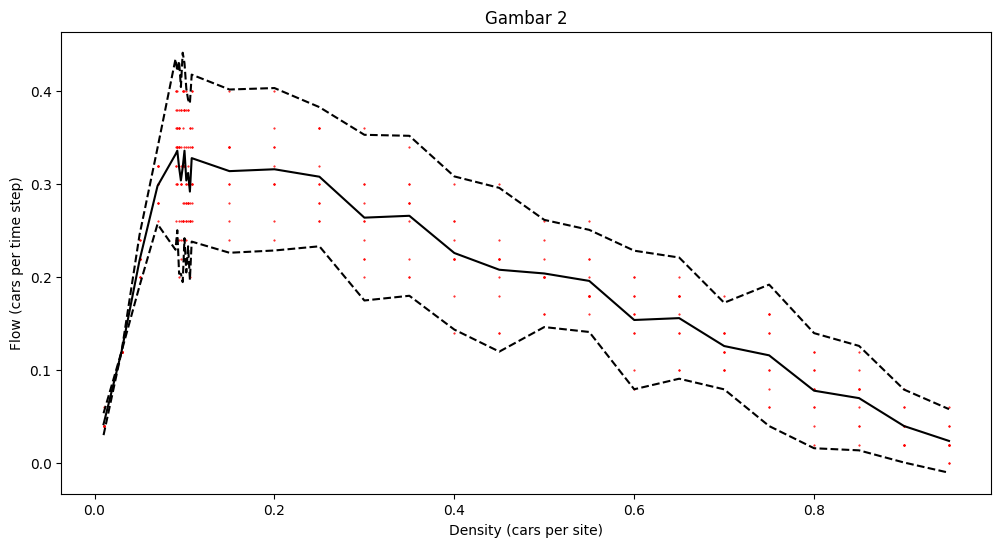

In [33]:
#Gambar 2
#plot hasil
m = np.mean(np.array(data_flow), axis=1)
s = np.std(np.array(data_flow), axis=1)
plt.figure(figsize=(12, 6))
plt.plot(data_density, data_flow, 'r.', markersize=1)
plt.plot(data_density, m, 'k-')
plt.plot(data_density, m + 1.96*s, 'k--')
plt.plot(data_density, m - 1.96*s, 'k--')
plt.title('Gambar 2')
plt.xlabel('Density (cars per site)')
plt.ylabel('Flow (cars per time step)')


# Menyimpan gambar dalam format PNG
plt.savefig('plot1.png', format='png', dpi=300)

plt.show()


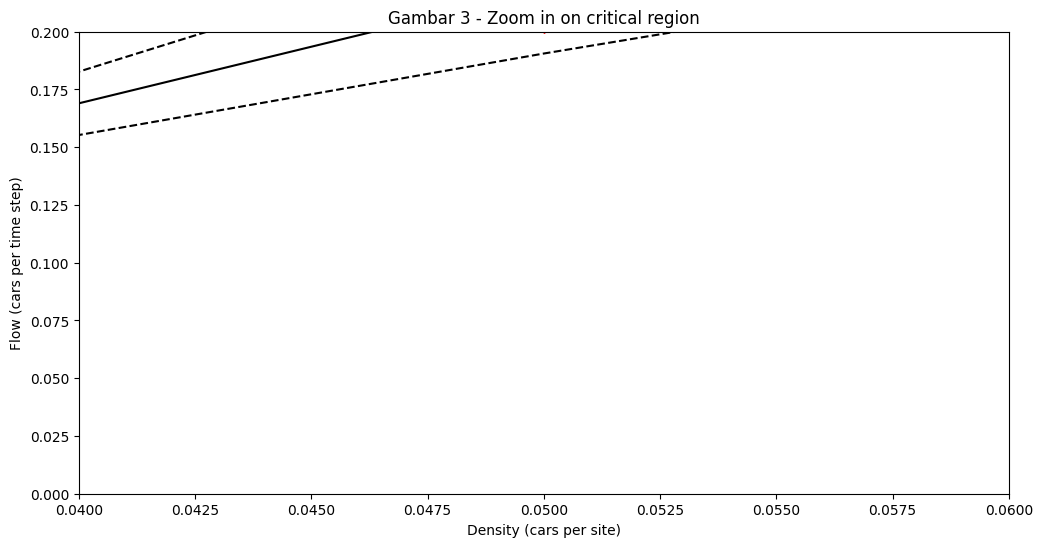

In [34]:
#Gambar 3
#memperbesar pada wilayah kritis
plt.figure(figsize=(12, 6))
plt.plot(data_density, data_flow, 'r.', markersize=1)
plt.plot(data_density, m, 'k-')
plt.plot(data_density, m + 1.96*s, 'k--')
plt.plot(data_density, m - 1.96*s, 'k--')
plt.title('Gambar 3 - Zoom in on critical region')
plt.xlabel('Density (cars per site)')
plt.ylabel('Flow (cars per time step)')
plt.xlim(0.04, 0.06)
plt.ylim(0.0, 0.2)


# Menyimpan gambar dalam format PNG
plt.savefig('plot2.png', format='png', dpi=300)

plt.show()

In [35]:
data_flow = []
data_density = []

densities = np.arange(0, 0.8, 0.1)
for density in densities:
    data_flow.append([])
    for run in range(10):
        sim = TrafficSimulation(car_density=density, slow_down_prob=0.)
        for i in range(50):
            sim.step(display=False)
        data_flow[-1].append(sim.cumulative_traffic_flow / sim.time_step)

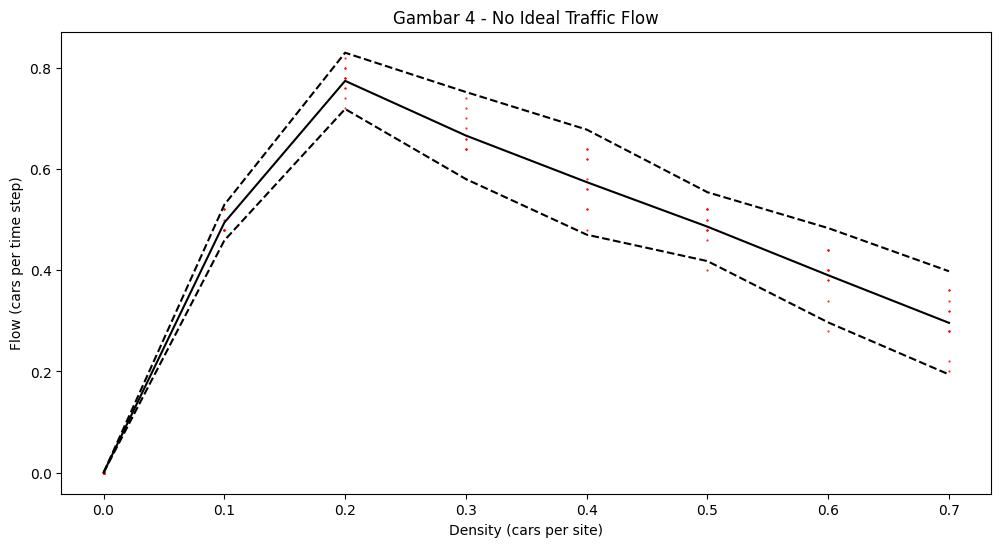

In [36]:
#Gambar 4
#plot hasil
m = np.mean(np.array(data_flow), axis=1)
s = np.std(np.array(data_flow), axis=1)
plt.figure(figsize=(12, 6))
plt.plot(densities, data_flow, 'r.', markersize=1)
plt.plot(densities, m, 'k-')
plt.plot(densities, m + 1.96*s, 'k--')
plt.plot(densities, m - 1.96*s, 'k--')
plt.title('Gambar 4 - No Ideal Traffic Flow')
plt.xlabel('Density (cars per site)')
plt.ylabel('Flow (cars per time step)')

# Menyimpan gambar dalam format PNG
plt.savefig('plot3.png', format='png', dpi=300)

plt.show()